# Simple Linear Regression

Linear regression is a linear or straight line relationship between the input variables (X) and the single output variable(Y)

y=mx+b  -->y-Dependant variable
           x-Independant Variable
           m-Cofficient/rate/slope of line
           b-y_intercept
           

In [1]:
# Let us consider a dataset where we have a value of response y for every feature x:
import numpy as np
x=np.array([0,1,2,3,4,5,6,7,8,9])
y=np.array([1,3,2,5,7,8,8,9,10,12])

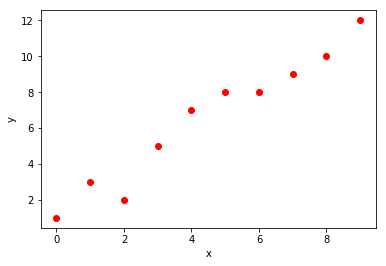

In [2]:
import matplotlib.pyplot as plt
plt.scatter(x,y,color='red')    #having a scatter plot
plt.xlabel('x')
plt.ylabel('y')
plt.show()


## Now the task is to find a line which fits best in above scatter plot so that we can predict the response for any feature value(i.e. a value of x not present in the data set)
- This line is called regression line

In [3]:
#   m=mean(x)*mean(y)-mean(xy)/mean(x)^2-mean(x^2)
# formula for b is
# b=mean(y)-m*mean(x)

In [4]:
#### find m and b

In [5]:
def best_fit_slope(x,y):
    m=(((np.mean(x)*np.mean(y))-np.mean(x*y))/
        ((np.mean(x)**2)-np.mean(x**2)))
    b=np.mean(y)-m*np.mean(x)
    return m,b

In [6]:
m,b=best_fit_slope(x,y)
print m,b

1.1696969697 1.23636363636


In [7]:
regression_line = [(m*i+b) for i in x]
#regression_line

In [8]:
predict_x=10
#y=mx+b
predict_y=(m*predict_x)+b
predict_y      #for a random value of x we predicted the value of y

12.933333333333334

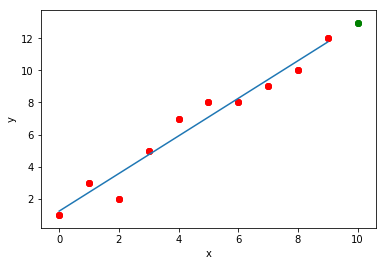

In [11]:
# for visualisation
plt.scatter(x,y,color='red')
plt.scatter(predict_x,predict_y,color='g')
plt.plot(x,regression_line)

#putting labels
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# R^2(Cofficient of determination):regression score function.
- it has value from 0 to 1
- if value close to 1 then it is our best fit
- a model fits the data well if the difference between the observed values and the odels predicted values are small
- The distance between the regression line y value and the data's y value is the error then we square it.

In [13]:
# r^2=1-(SE(line(y))/SE(mean(y)))   #SE-sum of squared error

In [20]:
def squared_error(ys_original,ys_line):
    return sum((ys_line-ys_original)**2)

In [23]:
def coefficient_of_determination(ys_orig,ys_line):
    y_mean_line=[np.mean(ys_orig) for y in ys_orig]
    squared_error_regr=squared_error(ys_orig,ys_line)
    squared_error_y_mean=squared_error(ys_orig,y_mean_line)
    return 1-(squared_error_regr/squared_error_y_mean)

In [24]:
r_squared=coefficient_of_determination(y,regression_line)
print(r_squared)

0.952538038614


# Now using Scikit-Learn

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [28]:
lg=LinearRegression()
lg.fit(x.reshape(-1,1),y)       #x should not be 1D so we have to make it 2D

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
y_predict=lg.predict(10)

In [30]:
y_predict

array([ 12.93333333])

In [34]:
a=np.array([1,2,3])     #for multiple prediction
a=a.reshape(len(a),1)
y_predict=lg.predict(a)

In [35]:
y_predict

array([ 2.40606061,  3.57575758,  4.74545455])

In [36]:
print lg.coef_
print lg.intercept_

[ 1.16969697]
1.23636363636


In [37]:
r2_score(y,lg.predict(x.reshape(-1,1)))    

0.952538038613988